KAGGLE COMPETITION LINK:
https://www.kaggle.com/competitions/spaceship-titanic/data
    
GOAL:
In this competition your task is to predict whether a passenger was transported to an alternate dimension during 
the Spaceship Titanic's collision with the spacetime anomaly. 
To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
# first look at the data

train_data.shape

(8693, 14)

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
# preparing the data


train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# handling missing values
# filling numeric values with the mean and categorical ones with the mode
# name and cabin columns are exempted because i will drop them

train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data['RoomService'].fillna(train_data['RoomService'].mean(),inplace=True)
train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean(),inplace=True)
train_data['Spa'].fillna(train_data['Spa'].mean(),inplace=True)
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean(),inplace=True)
train_data['VRDeck'].fillna(train_data['VRDeck'].mean(),inplace=True)
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0],inplace=True)
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0],inplace=True)
train_data['Destination'].fillna(train_data['Destination'].mode()[0],inplace=True)
train_data['VIP'].fillna(train_data['VIP'].mode()[0],inplace=True)
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [10]:
# checking to see if we have duplicate rows or not

train_data.loc[train_data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [11]:
# understanding the features

train_data['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [12]:
train_data['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [13]:
train_data['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [14]:
train_data['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [15]:
train_data['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

Text(0.5, 0, 'Age')

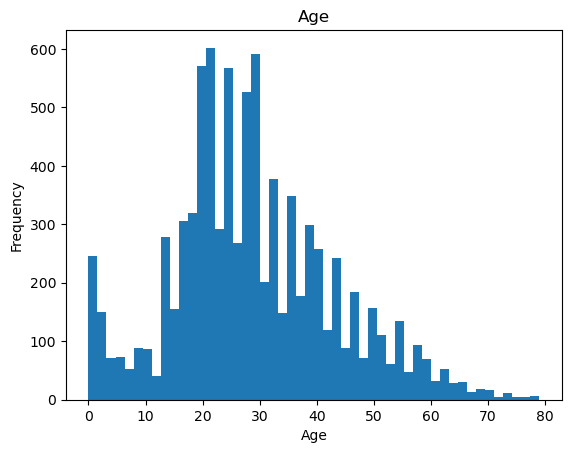

In [16]:
ax = train_data['Age'].plot(kind='hist',
                          bins=50,
                          title='Age')
ax.set_xlabel('Age')

In [17]:
train_data[(train_data['Age'] == 0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.000000,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,173.729169,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Raque Webstephrey,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,False,0.0,0.0,173.729169,0.0,0.0,Adamie Trerady,True
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Idace Edwartizman,True
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Robyny Hinglendez,True
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.000000,0.0,0.0,Walls Paie,True


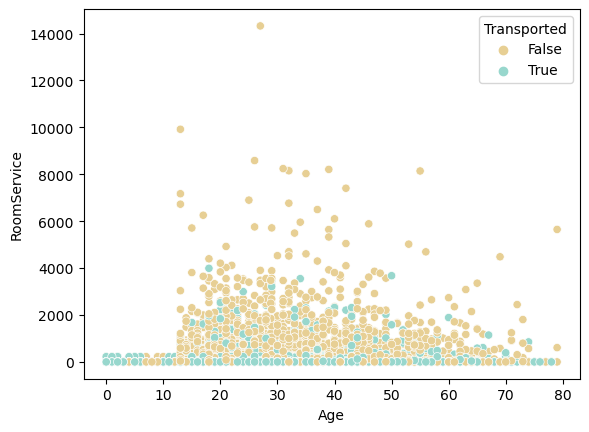

In [18]:
# exploring relationships between features

# people that have spent a lot of money tend to not get transported

ax = sns.scatterplot(x='Age',
                y='RoomService',
                hue='Transported',
                palette ='BrBG',
                data=train_data)
plt.show()

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


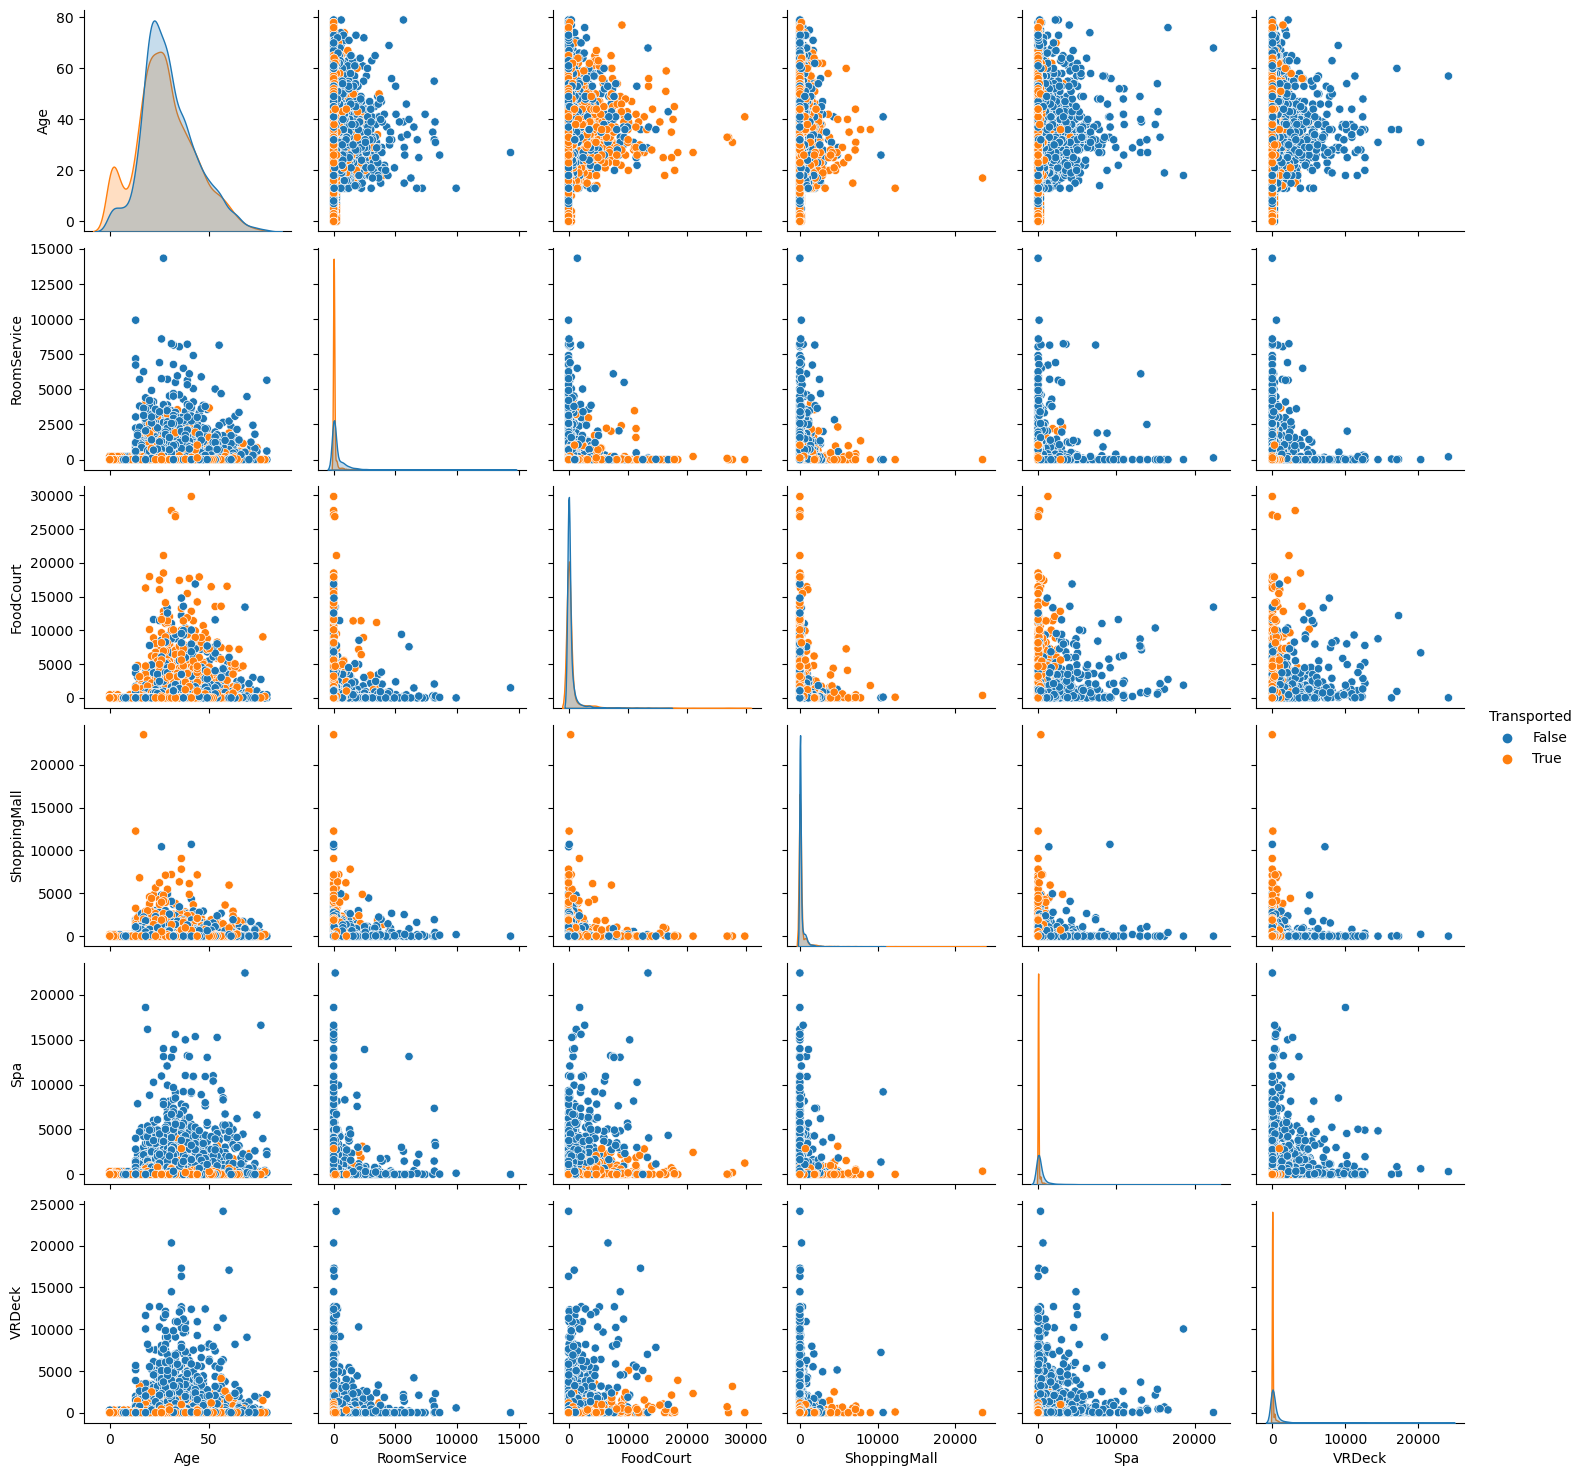

In [19]:
# there is clustering in the data so I will approach this problem with random forests.

sns.pairplot(train_data,
             vars=['Age','RoomService',
                   'FoodCourt','ShoppingMall','Spa','VRDeck'],
            hue='Transported')
plt.show()

In [20]:
# applying random forest
# first dealing with categorical values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = train_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].apply(label_encoder.fit_transform)

In [21]:
train_data.HomePlanet.value_counts()

HomePlanet
0    4803
1    2131
2    1759
Name: count, dtype: int64

In [22]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
train_data.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.649833,0.349362,1.494306,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791
std,0.795183,0.476796,0.814966,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [24]:
# defining target variable
y = train_data.Transported

In [25]:
# creating X
features = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
X = train_data[features]

In [26]:
# creating random forest on all training data
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X, y)

RandomForestClassifier(random_state=1)

In [27]:
# reading the test data
test_data = pd.read_csv('test.csv')

In [28]:
# performing similar actions

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
test_data.shape

(4277, 13)

In [30]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [31]:
# handling missing data from test dataset

test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['RoomService'].fillna(test_data['RoomService'].median(),inplace=True)
test_data['FoodCourt'].fillna(test_data['FoodCourt'].median(),inplace=True)
test_data['Spa'].fillna(test_data['Spa'].median(),inplace=True)
test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median(),inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].median(),inplace=True)
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0],inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0],inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0],inplace=True)
test_data['VIP'].fillna(test_data['VIP'].mode()[0],inplace=True)
test_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [32]:
label_encoder = LabelEncoder()
test_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = test_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].apply(label_encoder.fit_transform)

In [33]:
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Name', axis=1)

In [34]:
test_data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [35]:
# creating test_X
test_X = test_data[features]

In [36]:
test_preds = rf_model.predict(test_X)

In [37]:
# Run the code to save predictions

output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Transported': test_preds})
output.to_csv('submission.csv', index=False)

In [39]:
output.head(25)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [ ]:
# model accuracy according to kaggle = 0.79